In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00


In [2]:
!gdown 1bVo8L7M2rCEn8KVvQNrqHUcM0Mjv5dry

Downloading...
From: https://drive.google.com/uc?id=1bVo8L7M2rCEn8KVvQNrqHUcM0Mjv5dry
To: /content/PK.zip
100% 2.46k/2.46k [00:00<00:00, 14.5MB/s]


In [3]:
!unzip PK.zip

Archive:  PK.zip
  inflating: female.txt              
  inflating: male.txt                
  inflating: shape.txt               
  inflating: stem.txt                


In [4]:
female=[line.strip() for line in open('female.txt')]
male=[line.strip() for line in open('male.txt')]
shape=[line.strip() for line in open("shape.txt")]
stem=[line.strip() for line in open("stem.txt")]
female_words=set(female)
male_words=set(male)
shape_words=set(shape)
stem_words=set(stem)

In [5]:
import requests
def download_file(url, filename=None):
    if not filename:
        filename = url.split('/')[-1]
    with open(filename, 'wb') as file:
        response = requests.get(url)
        file.write(response.content)

In [6]:
bangla2b_url="https://huggingface.co/csebuetnlp/banglabert/raw/main/vocab.txt"

In [7]:
download_file(bangla2b_url,"bangla2b.txt")

In [8]:
bangla2b_text_file=[line.strip() for line in open('bangla2b.txt')]

In [9]:
number_of_male_words=0
number_of_female_words=0
number_of_shape_words=0
number_of_stem_words=0

bangla2b_words=set(bangla2b_text_file)

In [10]:
number_of_female_words_in_bangla2b=len(bangla2b_words.intersection(female_words))
number_of_male_words_in_bangla2b=len(bangla2b_words.intersection(male_words))
number_of_shape_words_in_bangla2b=len(bangla2b_words.intersection(shape_words))
number_of_stem_words_in_bangla2b=len(bangla2b_words.intersection(stem_words))

In [11]:
print(f"Number of female words in bangla2b {number_of_female_words_in_bangla2b}")
print(f"Number of male words in bangla2b {number_of_male_words_in_bangla2b}")
print(f"Number of shape words in bangla2b {number_of_shape_words_in_bangla2b}")
print(f"Number of stem words in bangla2b {number_of_stem_words_in_bangla2b}")
print(f"Total words in bangla2b {len(bangla2b_words)}")

Number of female words in bangla2b 29
Number of male words in bangla2b 32
Number of shape words in bangla2b 17
Number of stem words in bangla2b 2
Total words in bangla2b 32000


In [12]:
stemword_jeigula_bangla2b_te_ase=bangla2b_words.intersection(stem_words)
stemword_jeigula_bangla2b_te_nai=stem_words-bangla2b_words

In [13]:
stemword_jeigula_bangla2b_te_ase

{'ডাক্তার', 'বিজ্ঞানী'}

In [14]:
!pip install git+https://github.com/csebuetnlp/normalizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-l5327b5i
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-l5327b5i
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6859 sha256=5b09c018068aa2891cce9033b990352bc776304e5c3b43dce34f6912b96e4fa8
  Stored in directory: /tmp/pip-ephem-wheel-cache-igk0bggs/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186459 sha256=8eff74fdd9690a4e231da69951f02805000e56c

In [15]:
from transformers import AutoModelForPreTraining, AutoTokenizer
from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer
import torch
modelname="csebuetnlp/banglabert"
model = AutoModelForPreTraining.from_pretrained(
            modelname,
            output_hidden_states=True,
            output_attentions=True,
            cache_dir="cache/models/transformers",

        )
tokenizer = AutoTokenizer.from_pretrained(
            modelname,
            cache_dir="cache/models/transformers"
        )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [16]:
from tqdm import tqdm

def get_embeddings(model, tokenizer, words, use_gpu=False):
    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else "cpu")
    model.to(device)

    all_embeddings = []
    for word in tqdm(words):
        fake_inputs = tokenizer.encode(word, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model(fake_inputs)

        hidden_states = outputs["hidden_states"]
        embedding = hidden_states[-1]  # last layer
        all_embeddings.append(embedding.mean(dim=1))  # mean pooling

    return torch.stack(all_embeddings)

In [18]:
male_word_list=list(male_words)
#bangla2b_words_list=list(bangla2b_words)
stemword_jeigula_bangla2b_te_ase=list(stemword_jeigula_bangla2b_te_ase)
stemword_jeigula_bangla2b_te_nai=list(stemword_jeigula_bangla2b_te_nai)

In [19]:
male_words_cluster=get_embeddings(model,tokenizer,male_word_list,use_gpu=True)

100%|██████████| 55/55 [00:02<00:00, 26.72it/s]


In [20]:
stemword_jeigula_bangla2b_te_ase_cluster=get_embeddings(model,tokenizer,stemword_jeigula_bangla2b_te_ase,use_gpu=True)

100%|██████████| 2/2 [00:00<00:00, 97.45it/s]


In [21]:
stemword_jeigula_bangla2b_te_nai_cluster=get_embeddings(model,tokenizer,stemword_jeigula_bangla2b_te_nai,use_gpu=True)

100%|██████████| 46/46 [00:00<00:00, 97.09it/s] 


In [22]:
cluster_1=stemword_jeigula_bangla2b_te_ase_cluster.cpu()
cluster_2=stemword_jeigula_bangla2b_te_nai_cluster.cpu()
# cluster_1=stemword_jeigula_banglalm_e_ase_cluster.cpu()
# cluster_2=stemword_jeigula_banglalm_e_nai_cluster.cpu()
cluster_3=male_words_cluster.cpu()

In [23]:
embeddings1=cluster_1.squeeze()
embeddings2=cluster_2.squeeze()
embeddings3=cluster_3.squeeze()

In [24]:
!pip install openTSNE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.1 MB/s eta 0:00:00


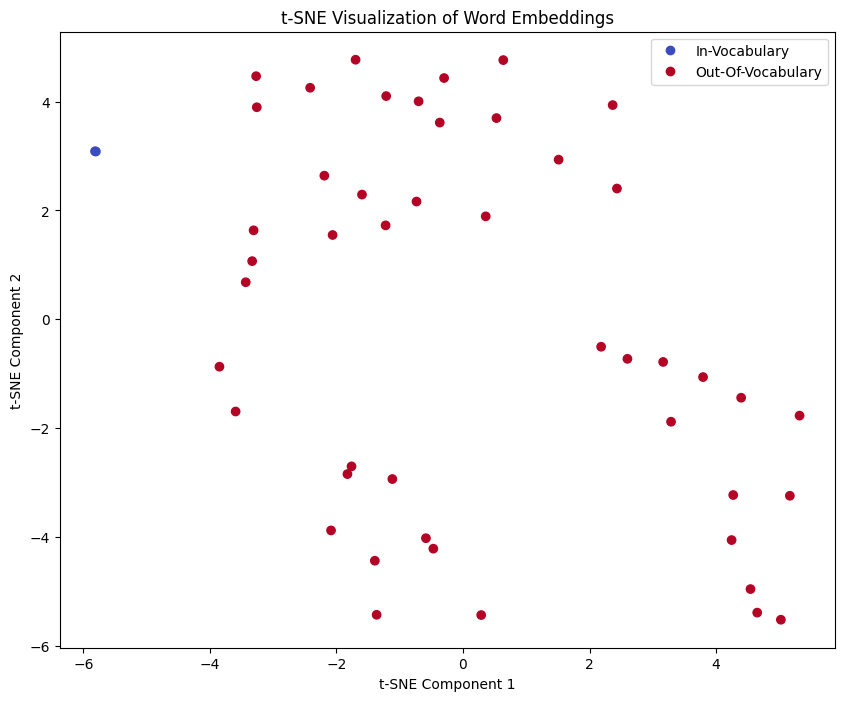

In [34]:
from openTSNE import TSNE
import numpy as np
import matplotlib.pyplot as plt
# Convert embeddings to numpy arrays
embeddings1_np = embeddings1.numpy()
embeddings2_np = embeddings2.numpy()
embeddings3_np = embeddings3.numpy()
# Combine the embeddings and labels for t-SNE
combined_embeddings = np.vstack((embeddings1_np, embeddings2_np))
labels = np.array([0]*len(embeddings1_np) + [1]*len(embeddings2_np) )
# Combine the embeddings and labels for t-SNE
combined_embeddings = np.vstack((embeddings1_np, embeddings2_np))

labels = np.array([0]*len(embeddings1_np) + [1]*len(embeddings2_np))

# Perform t-SNE using openTSNE
tsne = TSNE(n_components=2, random_state=42, n_jobs=20)  # Adjust n_jobs based on your CPU
combined_embeddings_2d = tsne.fit(combined_embeddings)
#print(combined_embeddings_2d.shape)
# Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(combined_embeddings_2d[:, 0], combined_embeddings_2d[:, 1], c=labels, cmap='coolwarm')

# Annotate words (optional)
#for i, word in enumerate(words):
#    plt.annotate(word, (combined_embeddings_2d[i, 0], combined_embeddings_2d[i, 1]))
#    plt.annotate(word, (combined_embeddings_2d[len(words) + i, 0], combined_embeddings_2d[len(words) + i, 1]))

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Word Embeddings")
plt.legend(handles=scatter.legend_elements()[0], labels=['In-Vocabulary', 'Out-Of-Vocabulary'])
plt.show()

In [35]:
combined_embeddings_2d[:, 0]

TSNEEmbedding([-5.8171715 , -5.80317613,  0.28786692, -0.70165396,
                3.16397236,  4.27181585,  0.52925052, -2.08610331,
               -1.69776677,  0.35926376, -1.76205092, -1.36531489,
                2.18372775,  5.02509081, -1.11663839,  2.43389096,
               -2.19173941, -1.82669504, -0.36707969,  4.5449166 ,
                4.24624211, -0.73462887, -1.59649315,  5.16732059,
               -3.27002634,  3.7946888 , -0.2988599 , -0.46894699,
                4.65090565,  2.59956527, -1.39339365,  3.28907134,
                2.36613333,  0.63674871, -0.58567384, -3.31011091,
               -3.59444486,  1.51162223, -3.33284646,  5.32037486,
               -1.21411609, -3.25964386, -3.43438115, -2.41610541,
               -2.06124536,  4.39713701, -3.8499264 , -1.22337218])

In [36]:
combined_embeddings_2d[:, 1]

TSNEEmbedding([ 3.08667968,  3.08318248, -5.43753249,  4.00541429,
               -0.78541097, -3.23114686,  3.69737462, -3.88185402,
                4.76986497,  1.89112155, -2.70485128, -5.43278323,
               -0.50578921, -5.52351376, -2.93744669,  2.40220783,
                2.63886445, -2.84616369,  3.61468691, -4.96030812,
               -4.05934151,  2.16298259,  2.29119109, -3.2451888 ,
                4.46753321, -1.06324632,  4.43328026, -4.21732822,
               -5.39296973, -0.72798817, -4.43871041, -1.88413098,
                3.93629857,  4.76306144, -4.02504203,  1.63389891,
               -1.69622459,  2.93313706,  1.06788161, -1.77163034,
                4.10189981,  3.89616614,  0.67977093,  4.25456447,
                1.54820429, -1.44318312, -0.8724337 ,  1.72495108])